In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option("display.precision", 2)

# Pandas

Koristimo pandas biblioteku za manipulaciju podataka.
Glavni objekat u biblioteci je DataFrame , koji služi za rad sa tabelarnim podacima. Može se posmatrati kao
matrica redova i kolona koja nudi puno dodatnih funkcionalnosti.
Učitavamo paket i podatke o pokemonima pozivom metode read_csv().


## Glavne metode

Podatke učitavamo uz pomoć metode read_csv, pregled prvih 5 redova možemo ostvariti uz pomoć metode head.

In [52]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Pregled poslednjih pet redova:

In [53]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Svaki red odgovara jednom klijentu, tj. objektu našeg istraživanja, a kolone predstavljaju osobine tog objekta.

In [54]:
num_rows, num_columns = df.shape
print(f'Broj redova: {num_rows}, broj kolona {num_columns}')

Broj redova: 3333, broj kolona 20


Prikaz naziva kolona:

In [55]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Opšte informacije o DataFrame-u dobijamo koristeći metodu info:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   



Provera nedostajućih vrednosti:



In [57]:
df.isna().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


Unikatne vrednosti:

In [58]:
df.nunique()

,0
State,51
Account length,212
Area code,3
International plan,2
Voice mail plan,2
Number vmail messages,46
Total day minutes,1667
Total day calls,119
Total day charge,1667
Total eve minutes,1611


Već vidimo da nemamo duplikate, ali ćemo ostaviti korisne metode u nastavku:

In [59]:
# Vraća seriju sa True za redove koji su duplikati
df.duplicated()

# Vraća broj duplih redova
df.duplicated().sum()

# Prikazuje samo duplirane redove
df[df.duplicated()]

# Uklanja duplikate, zadržavajući prvi red
df.drop_duplicates(inplace=True)

Možemo promeniti tip kolone pomoću metode astype.

In [60]:
df["Churn"]

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


In [61]:
df["Churn"] = df["Churn"].astype("int64")
df["Churn"]

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


Metoda describe prikazuje osnovne statističke karakteristike svake numeričke osobine.

In [62]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [41]:
df["Total day minutes"].describe()

,Total day minutes
count,3333.00
mean,179.78
std,54.47
min,0.00
25%,143.70
50%,179.40
75%,216.40
max,350.80


- count : Broj ne-null vrednosti u koloni.   
    - Imamo 3333 zapisa sa podacima o dnevnim minutima razgovora.
- mean : srednja vrednost
    - Prosečno ljudi pričaju 101 minut u toku dana
- std : standardna devijacija (mera raspršenosti podataka oko srednje vrednosti)
    - Ovde znači da većina ljudi varira ±54 minuta oko prosjeka 180 minuta
- min : minimalna vrednost
    - Neko uopšte nije razgovarao
- 25%: Prva četvrtina podataka.
    - 25% podataka su ≤ 143.7 minuta
- 50% : Prve dve četvrtine podataka
    - Polovina ljudi ima manje, polovina više od 179.4 minuta.
- 75% : Tri četvrtine podataka
    - 75% podataka su ≤ 216.4 minuta
- max : maksimalna vrednost
    - Najduža upotreba u toku dana iznosi 350 minuta

<Axes: xlabel='Total day minutes'>

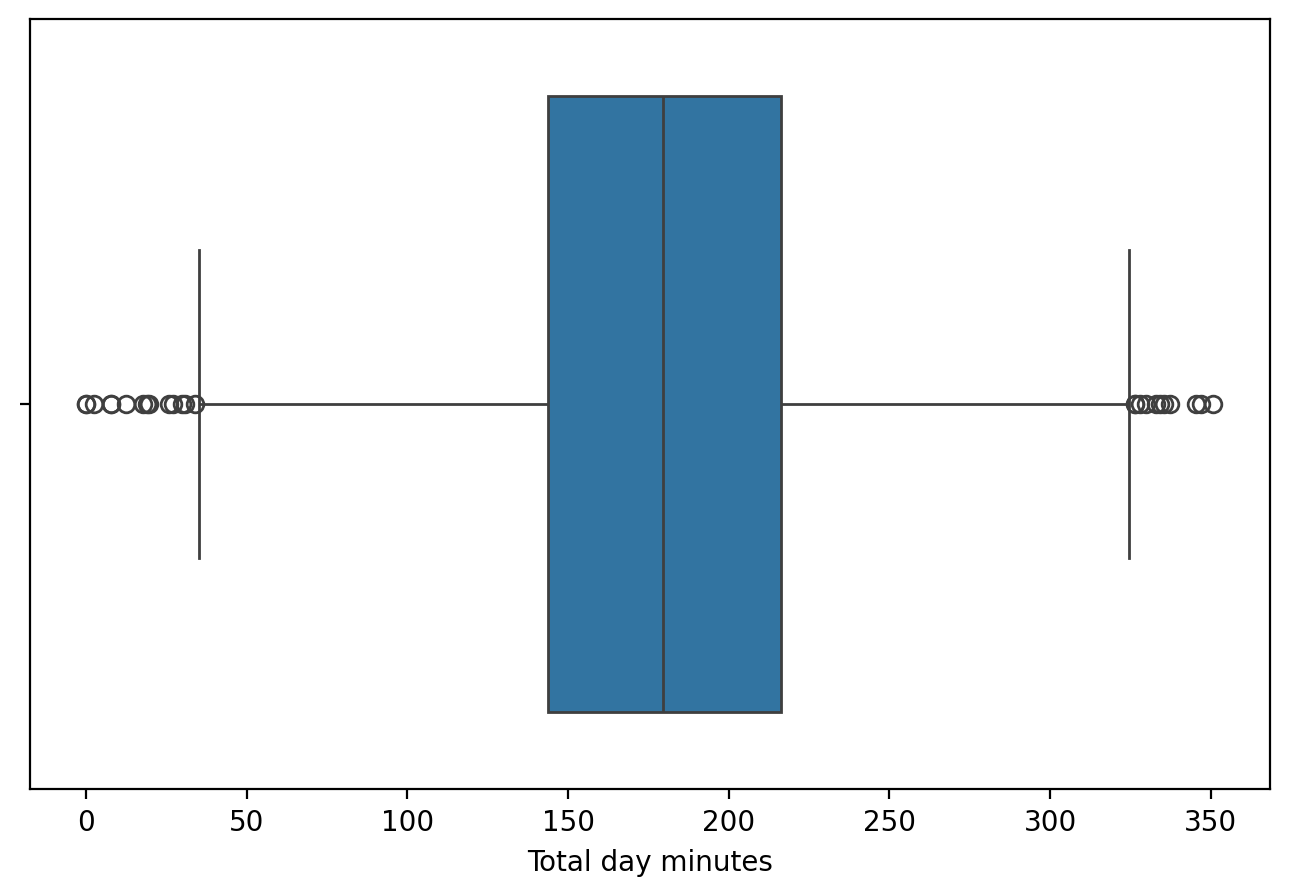

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Total day minutes", data=df)

Statistika za nenumeričke osobine:

In [64]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


- top: vrednost koja se najčešće pojavljuje
- freq: koliko često se ta najčešća vrednost pojavljuje

Za kategorijske osobine (tip object) i logičke osobine (tip bool) možemo koristiti metodu value_counts.
Raspodela osobine Churn:

In [65]:
df["Churn"].value_counts()

,count
Churn,
0,2850
1,483


483 korisnika od ukupno 3333 su napustili kompaniju ( Churn = 1).
Funkciji prosledimo normalize=True funkciji value_counts, kako bismo dobili procenat.

In [66]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.86
1,0.14


Vidimo da ~14% mušterija napušta kompaniju (ima churn True), to je poprilično loše.

Isto smo mogli izračunati:

In [67]:
df["Churn"].mean()

np.float64(0.14491449144914492)

## Primena funkcija na ćelije, kolone i redove


Da bismo primenili funkcije na svaku kolonu, koristimo apply():

In [68]:
df.apply(np.min)

,0
State,AK
Account length,1
Area code,408
International plan,No
Voice mail plan,No
Number vmail messages,0
Total day minutes,0.0
Total day calls,0
Total day charge,0.0
Total eve minutes,0.0


Da bismo primenili apply metodu na svaki red, potrebno je navesti axis=1.

Ako želimo da prikažemo instance kojima je area code 415, možemo to uraditi ovako:

In [69]:
df[df["Area code"].apply(lambda code: code == 415)].head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [70]:
df[df["Area code"] == 415].head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Zamenu vrednosti u koloni možemo izvršiti uz pomoć metode map i replace:

In [71]:
temp = {"No": 0, "Yes": 1}
df["International plan"] = df["International plan"].map(temp)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [72]:
df = df.replace({"Voice mail plan": temp})
df.head()

/tmp/ipython-input-2169574070.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": temp})


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [73]:
df["Voice mail plan"].dtype

dtype('int64')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

One hot encoding:

In [75]:
df2 = pd.read_csv("telecom_churn.csv")
df2 = pd.get_dummies(df2, columns=['State'], dtype=int)
df2.head()

# dummy encoding
# df2 = pd.get_dummies(df2, columns=['State'], drop_first=True, dtype=int)
# podrazumevana vrednost je False

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


## Pristup podacima

DataFrame-ovi se mogu indeksirati po nazivu kolone (label), nazivu reda (index) ili po rednom broju reda.
Metoda loc se koristi za indeksiranje po nazivu, dok se iloc() koristi za indeksiranje po broju.

U prvom primeru ispod, kažemo: „dajte nam vrednosti redova sa indeksom od 0 do 5 i kolona označenih od State do Area code“.
U drugom primeru, kažemo: „dajte nam vrednosti prvih pet redova u prva tri kolone“ (kao kod tipičnog Python slice-a: maksimalna vrednost nije uključena).

In [76]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


## Uslovan pristup

Nekada želimo da izdvojimo određene redove po nekom uslovu:

In [77]:
# 1. način
df[df['Churn'] == 0]

# 2. način
df.loc[df['Churn'] == 0]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Prikažimo medianu svih kolona korisnika koji su napustili kompaniju:

In [78]:
df[df["Churn"] == 1].median(numeric_only=True)

,0
Account length,103.00
Area code,415.00
International plan,0.00
Voice mail plan,0.00
Number vmail messages,0.00
Total day minutes,217.60
Total day calls,103.00
Total day charge,36.99
Total eve minutes,211.30
Total eve calls,101.00


Prikaz minutaže noćnih poziva korisnika koji su napustili kompaniju

In [79]:
df[df["Churn"] == 1]["Total night minutes"]

,Total night minutes
10,208.8
15,160.6
21,209.6
33,280.2
41,122.2
...,...
3301,156.8
3304,206.5
3320,120.1
3322,180.5


Prikaz minutaže međunarodnih poziva kod korisnika koji su napustili kompaniju i nemaju međunarodni plan:

In [82]:
df[(df["Churn"] == 1) & (df["International plan"] == 0)]["Total intl minutes"].median()

10.3

## Grupisanje

Generalno, grupisanje podataka u Pandas-u funkcioniše na sledeći način:



> df.groupby(by=grouping_columns)[columns_to_show].function()

1. Prvo, metoda groupby deli kolone iz grouping_columns po njihovim vrednostima. One postaju novi indeks u dobijenom DataFrame-u.

2. Zatim se biraju kolone od interesa (columns_to_show). Ako columns_to_show nije naveden, uključuju se sve kolone koje nisu deo groupby.

3. Na kraju, jedna ili više funkcija se primenjuju na dobijene grupe po izabranim kolonama.

Evo primera gde grupišemo podatke prema vrednostima promenljive Churn i prikazujemo statistiku tri kolone u svakoj grupi:





In [83]:
columns_to_show = ["Total day calls", "Total eve calls", "Total night calls"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day calls                                   Total eve calls  \
                count    mean    std  min    50%    max           count   
Churn                                                                     
0              2850.0  100.28  19.80  0.0  100.0  163.0          2850.0   
1               483.0  101.34  21.58  0.0  103.0  165.0           483.0   

                                         Total night calls                 \
         mean    std   min    50%    max             count    mean    std   
Churn                                                                       
0      100.04  19.96   0.0  100.0  170.0            2850.0  100.06  19.51   
1      100.56  19.72  48.0  101.0  168.0             483.0  100.40  19.95   

                           
        min    50%    max  
Churn                      
0      33.0  100.0  175.0  
1      49.0  100.0  158.0

## Sažeti prikazi (Summary tables)

Pretpostavimo da želimo da vidimo kako su posmatranja u našem uzorku raspoređena u kontekstu dve promenljive – Churn i International plan.
Da bismo to uradili, možemo koristiti metodu crosstab:

In [84]:
pd.crosstab(df["Churn"], df["International plan"], normalize=True)

International plan,0,1
Churn,,
0,0.8,0.06
1,0.1,0.04


In [85]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,0,1
Churn,,
0,0.60,0.25
1,0.12,0.02


Možemo videti da je većina korisnika koja je lojalnaa ne koristi dodatne usluge (International Plan/Voice mail).

Pivot tabele možemo kreirati metodom pivot_table prima sledeće parametre:

- values – lista promenljivih za koje želimo da izračunamo statistiku,

- index – lista promenljivih po kojima grupišemo podatke,

- aggfunc – statistika koju želimo da izračunamo za grupe, npr. sum, mean, maximum, minimum ili nešto drugo.

Hajde da pogledamo medianu dnevnih, večernjih i noćnih poziva po area code:

In [86]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="median",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.0,99.0,100.0
415,101.0,101.0,101.0
510,100.0,100.5,100.0


## Dodavanje i brisanje

Kao i mnoge druge stvari u Pandas-u, dodavanje kolona u DataFrame može se uraditi na više načina.

Na primer, ako želimo da izračunamo ukupan broj poziva za sve korisnike, možemo kreirati total_calls (Series objekat) i dodati je u DataFrame:

In [87]:
df["Total calls"] = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Da bismo obrisali kolone ili redove, koristimo metodu drop, pri čemu prosleđujemo potrebne indekse i parametar axis (1 ako brišemo kolone, 0 ako brišemo redove).
Argument inplace određuje da li će se promeniti originalni DataFrame.

- Sa inplace=False, metoda drop ne menja postojeći DataFrame, već vraća novi sa obrisanim redovima ili kolonama.
- Sa inplace=True, metoda menja originalni DataFrame.

In [88]:
# obrisaćemo tek kreirane kolone
df.drop([ 'Total calls'], axis=1, inplace=True)
# ovako brišemo redove, podrazumevano je axis=0
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# Seaborn

In [89]:
df = pd.read_csv("telecom_churn.csv")

temp = {"No": 0, "Yes": 1}
df["International plan"] = df["International plan"].map(temp)
df["Voice mail plan"] = df["Voice mail plan"].map(temp)

df["Churn"] = df["Churn"].astype("int64")
df["International plan"] = df["International plan"].astype("int64")
df["Voice mail plan"] = df["Voice mail plan"].astype("int64")

## Historgrami:

Histogram je grafički prikaz raspodele numeričkih podataka koji nam omogućava da vidimo kako se vrednosti neke promenljive raspoređuju kroz različite intervale, koje zovemo binovi. Na histogramu, x osa predstavlja vrednosti promenljive, dok y osa pokazuje koliko puta se svaka vrednost ili interval pojavljuje u skupu podataka. Visina svakog bar-a označava broj uzoraka u datom intervalu. Histogrami su veoma korisni za uočavanje oblika raspodele, koncentracije podataka, prisustva outlier-a i uočavanje simetrije ili asimetrije u podacima.

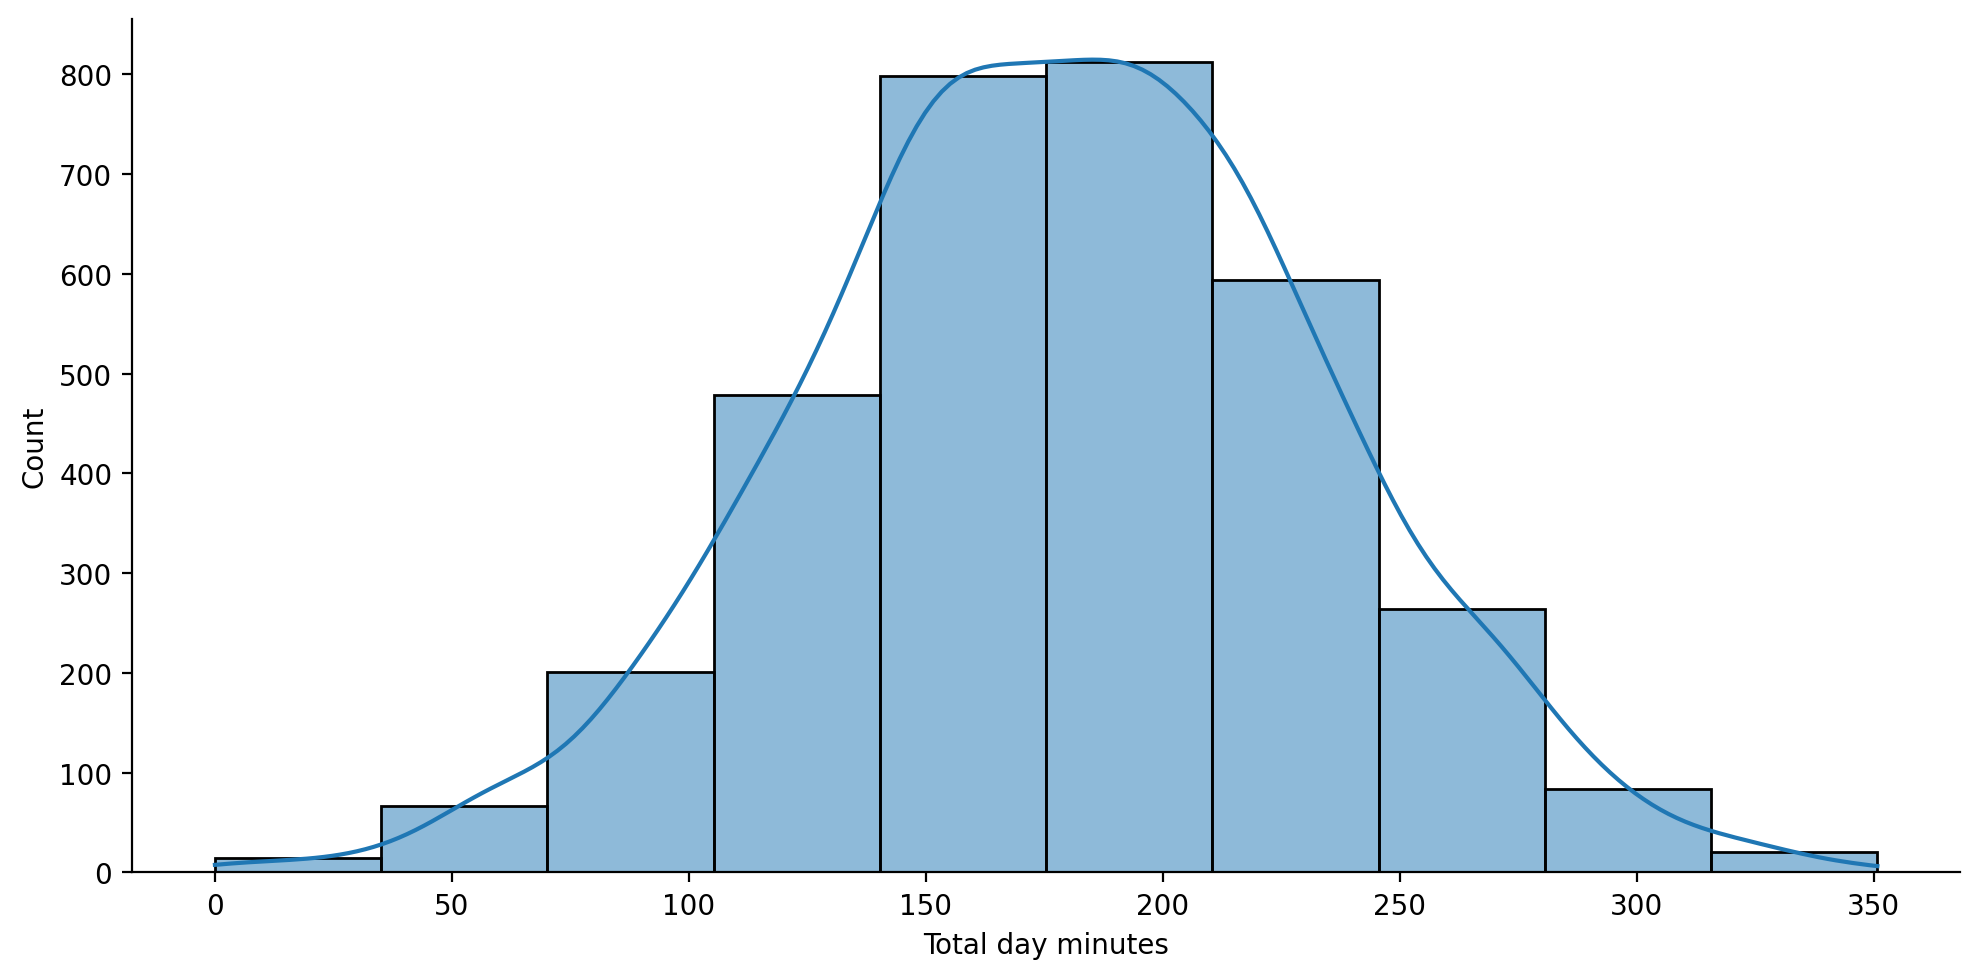

In [90]:
# aspect > 2, figura je šira od visine
sns.displot(data=df["Total day minutes"], bins=10, kde=True,  aspect=2)

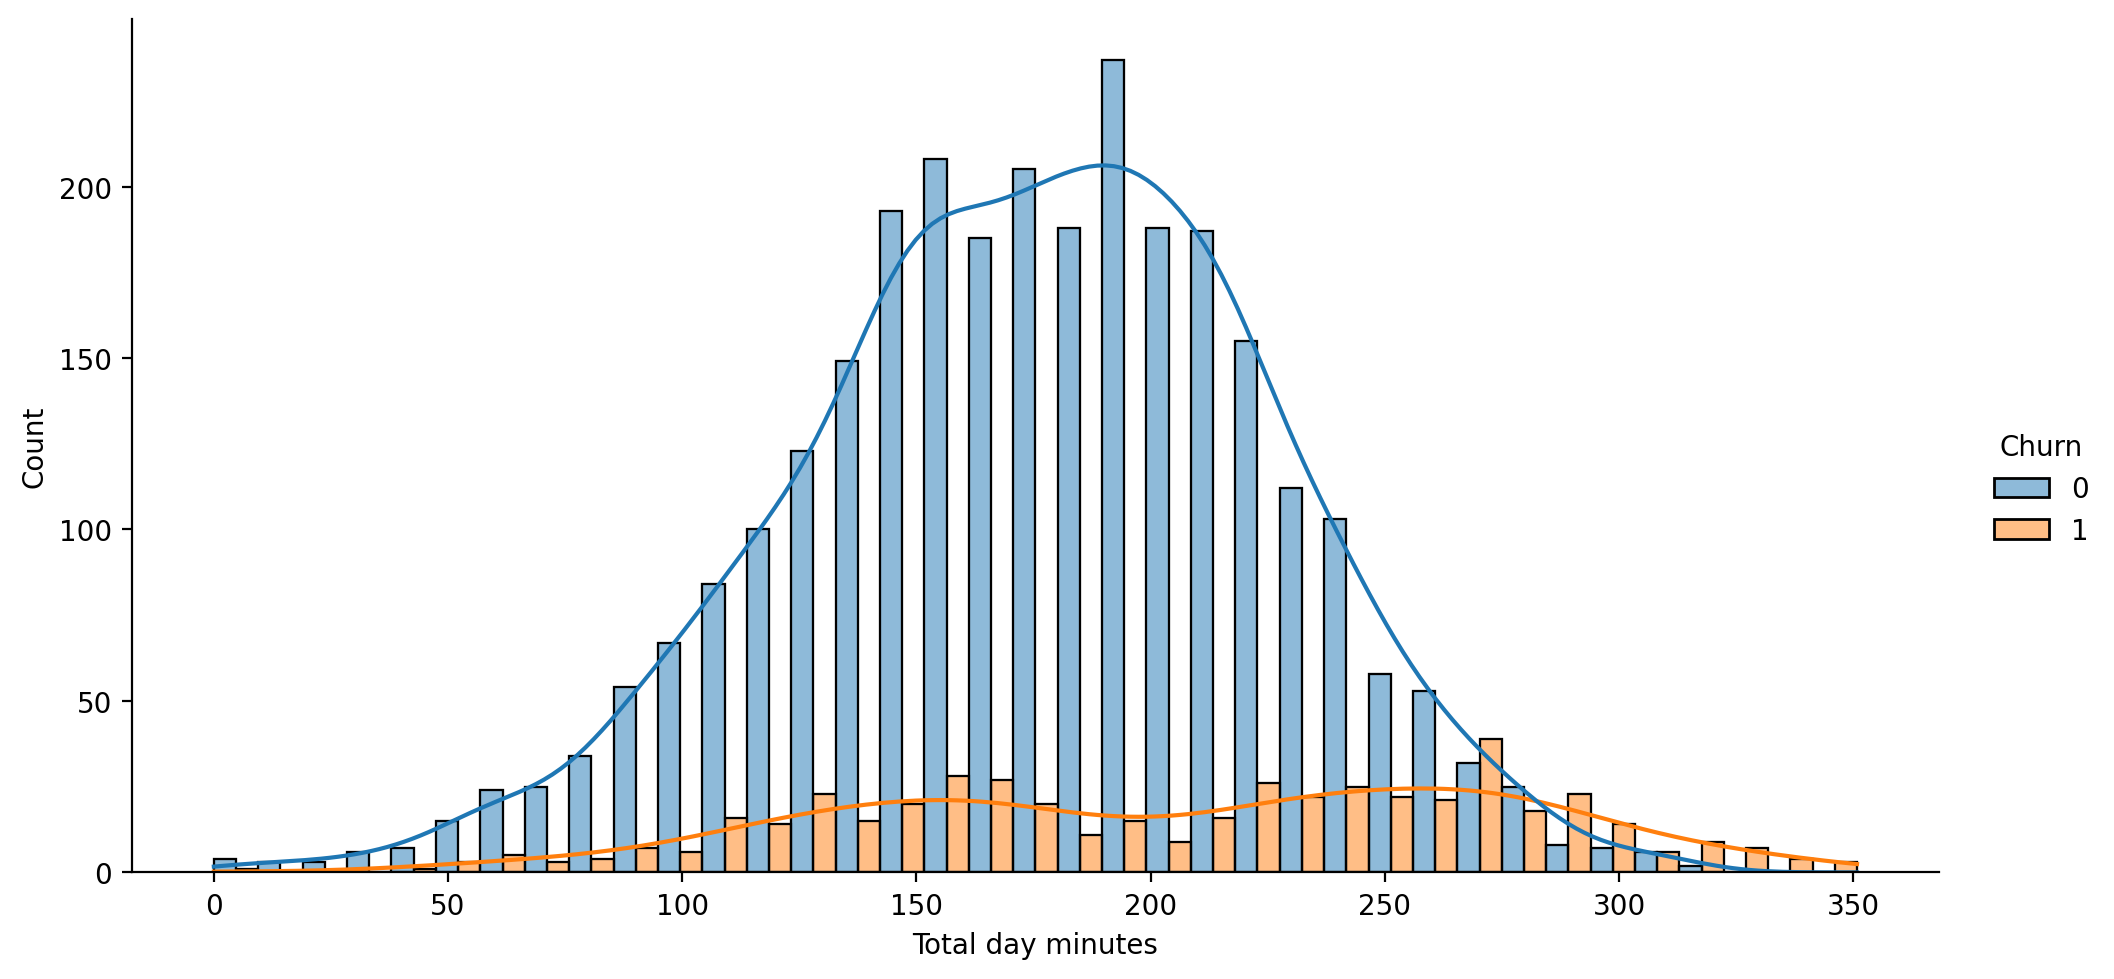

In [92]:
# multiple = dodge - svaka kategorija dobija svoj stub
sns.displot(data=df, x="Total day minutes", hue="Churn",  aspect=2, kind="hist", kde= True, multiple="dodge")

Displot je graf koji prikazuje raspodelu numeričkih podataka kroz binove (čiji broj može i sam automatski da odredi) i može dodati glatku krivu raspodele, dok je countplot specijalizovan za kategorizovane podatke i prikazuje koliko puta se svaka kategorija pojavljuje kroz bar plot.

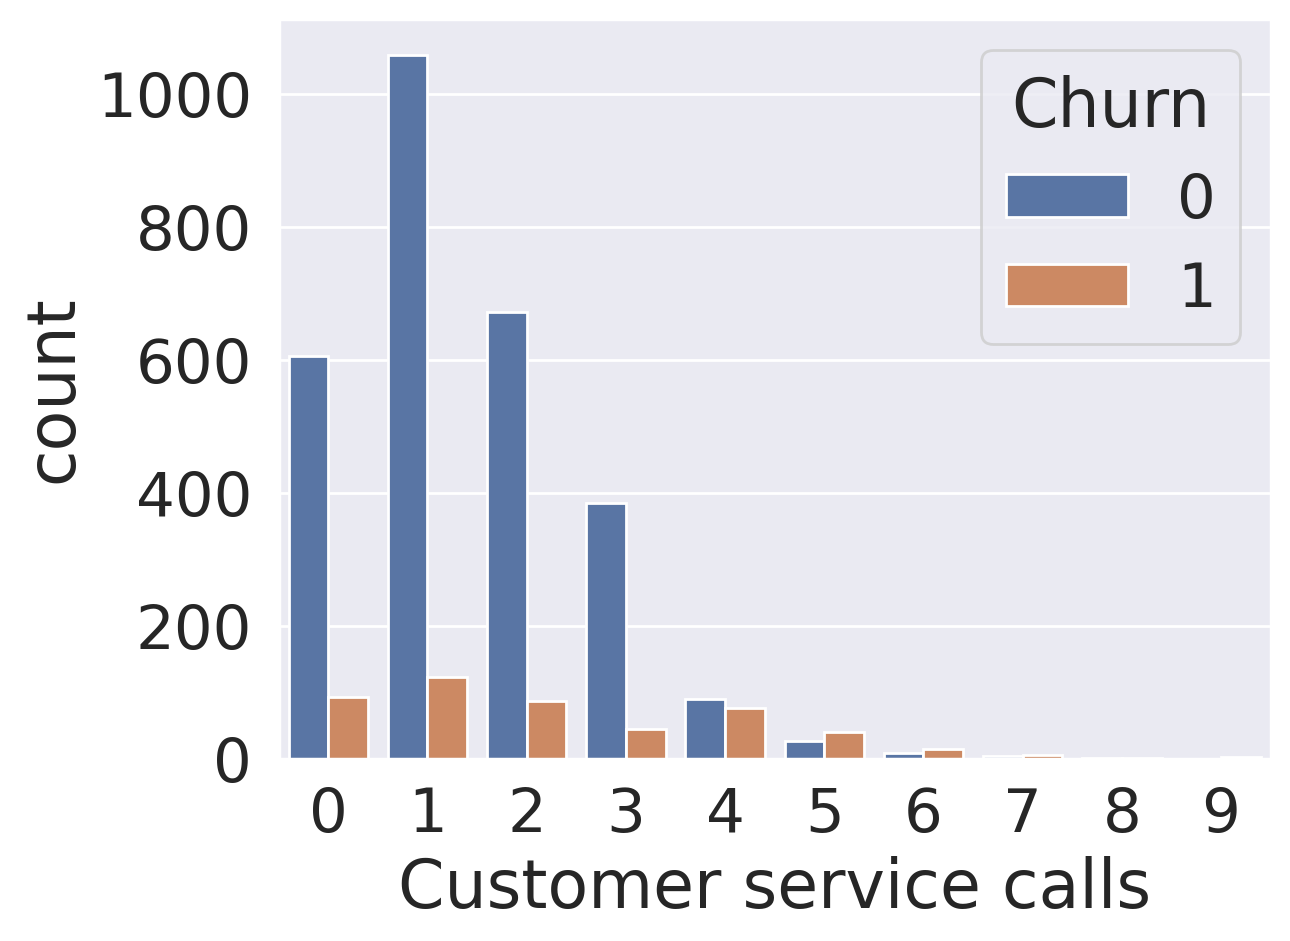

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

## Kutijasti dijagrami (box plot)

U našem primeru crtali smo kutijasti dijagram koji prikazuje vrednosti kolone Total day minutes za korisnike koji su napustili servis i one koji nisu.    
Svaka kutija pokazuje srednju vrednost ili medijanu, dok donja i gornja ivica označavaju prvi i treći kvartil. Linije koje izlaze iz kutije, tzv. whiskers, obeležavaju tipični raspon podataka, a tačke koje se nalaze van whiskersa predstavljaju outliere, odnosno ekstremne vrednosti koje se značajno razlikuju od većine.    
Ovaj dijagram omogućava brzo upoređivanje raspodele vremena razgovora između dve grupe korisnika i uočavanje odstupanja i ekstremnih vrednosti u datasetu.

<Axes: xlabel='Churn', ylabel='Total day minutes'>

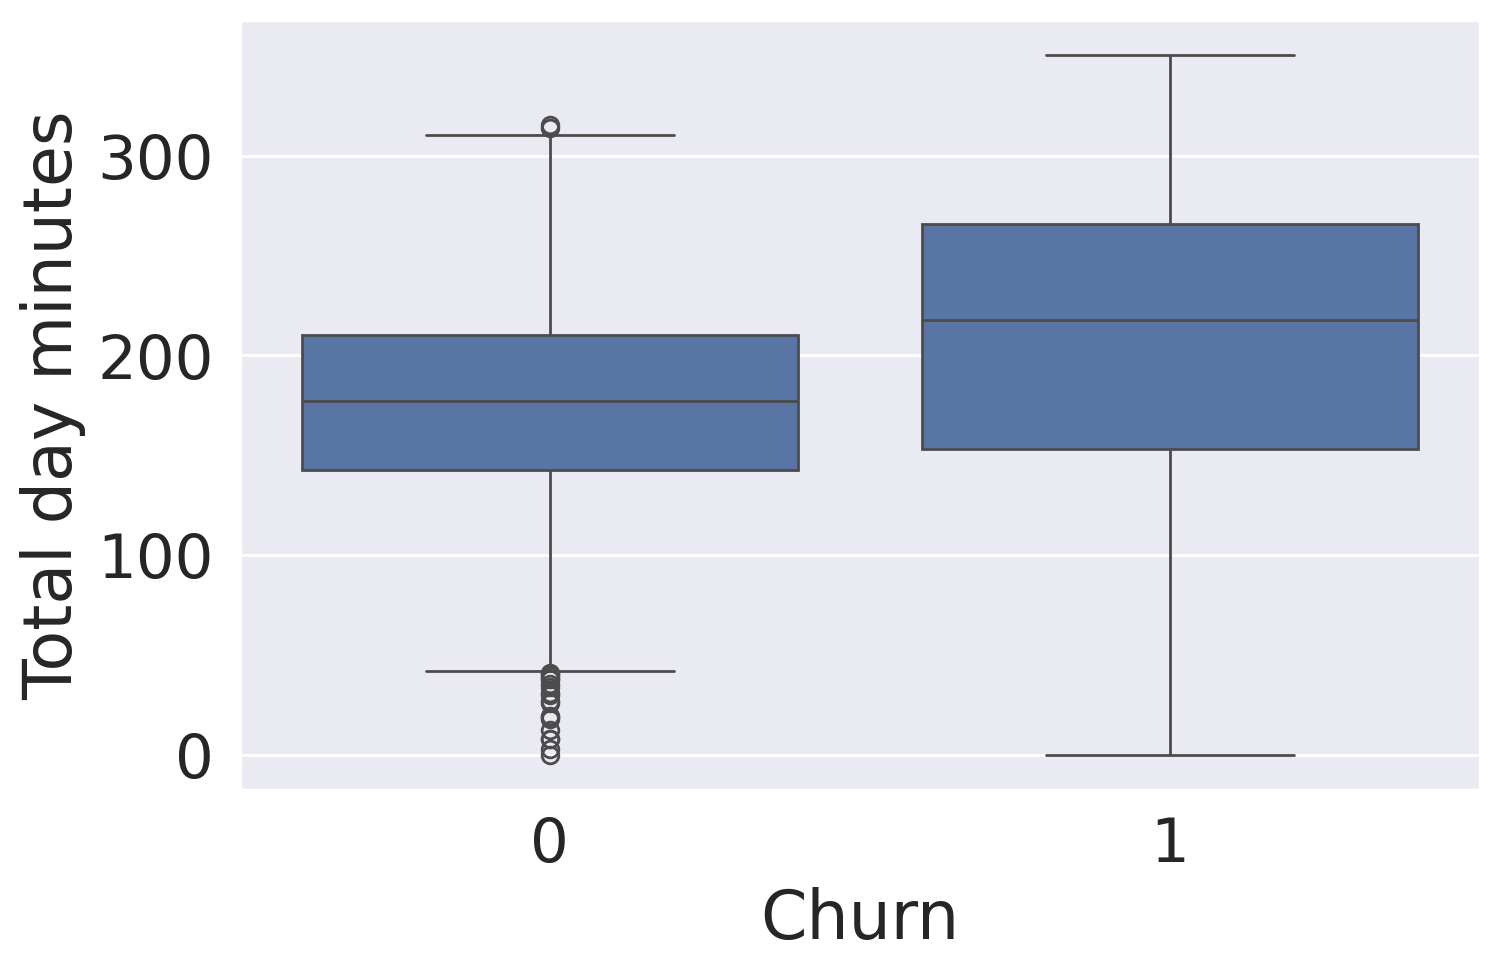

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Total day minutes", data=df)

## Dijagrami rasipanja (scatter plot)

Dijagram rasipanja ili scatter plot prikazuje odnos između dve numeričke promenljive, u našem primeru između Total day minutes i Total eve minutes.    
Svaka tačka na grafiku predstavlja jednog korisnika, dok boja tačke pokazuje da li je korisnik napustio servis ili ne. Transparentnost tačaka je dodata kako bi se preklapanja bolje uočila i kako bi gustina podataka bila vidljivija.   
Scatter plot omogućava da se vizuelno uoče trendovi, grupisanja i eventualne korelacije između potrošnje minuta u toku dana i večeri.

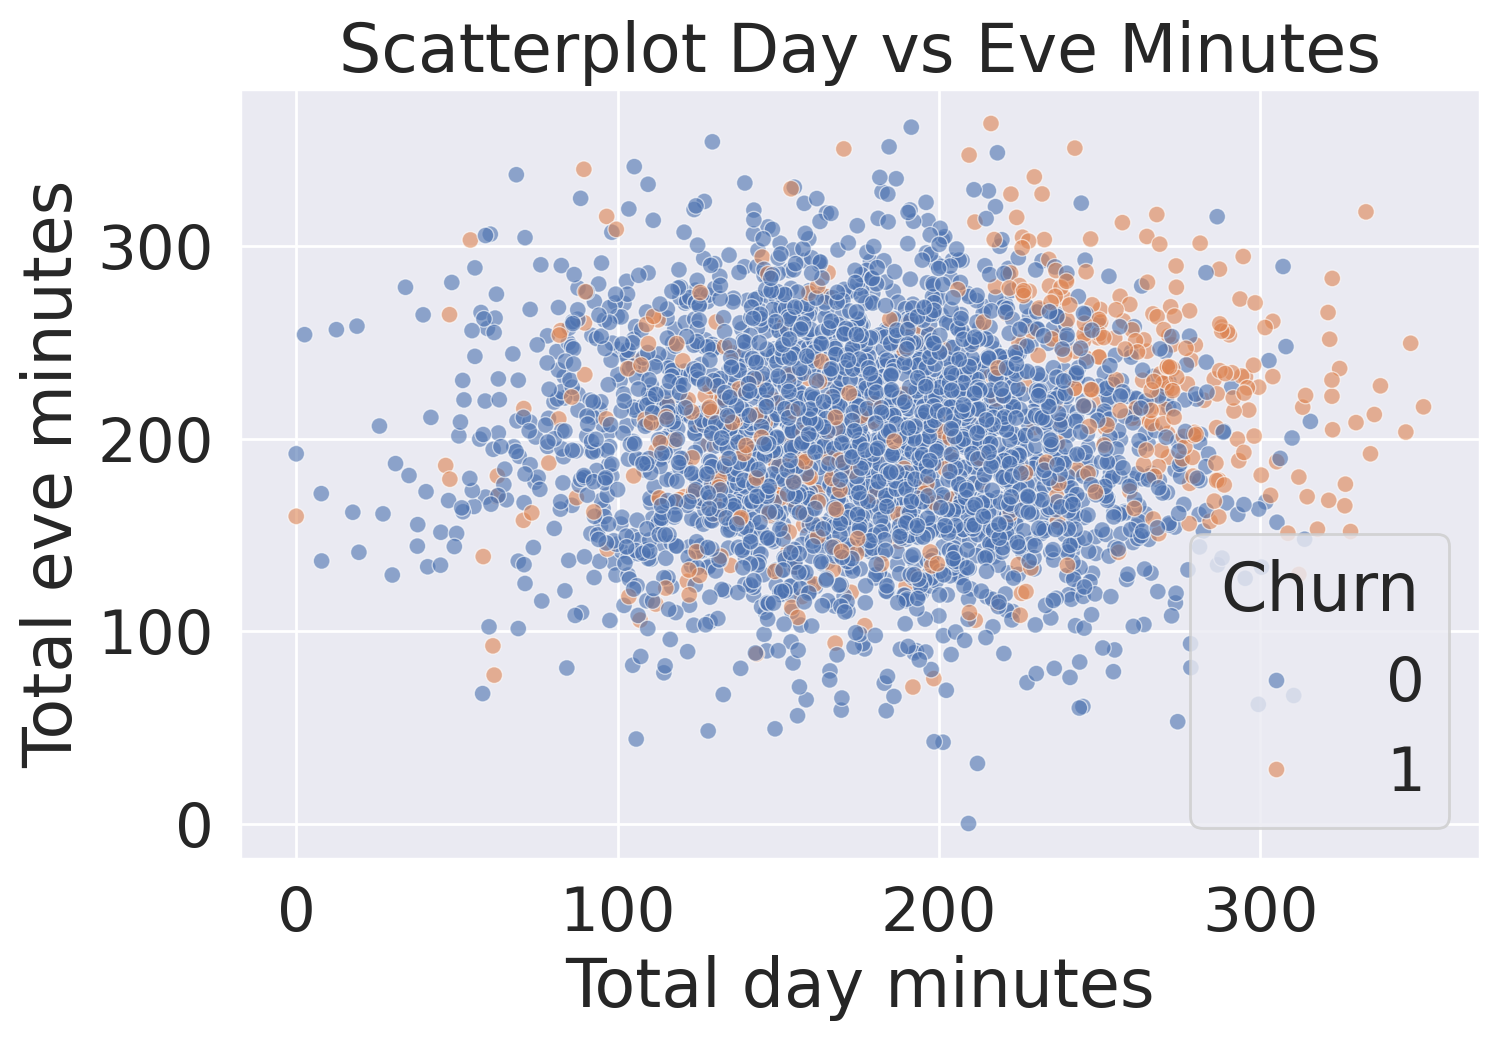

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total day minutes", y="Total eve minutes", hue="Churn", data=df, alpha=0.6)
plt.title("Scatterplot Day vs Eve Minutes")
plt.show()

## Dijagrami sa linijama (line plot)

Dijagram sa linijama ili line plot koristi se za prikaz promena vrednosti kroz neku kontinuiranu ili urednu sekvencu.   
U našem primeru izračunali smo prosečne vrednosti minuta u danu po broju poziva korisničkoj službi i prikazali ih linijom koja povezuje ove prosečne vrednosti. Svaka tačka označava prosečnu vrednost za određeni broj poziva, a linija pomaže da se vizuelno uoči trend.   


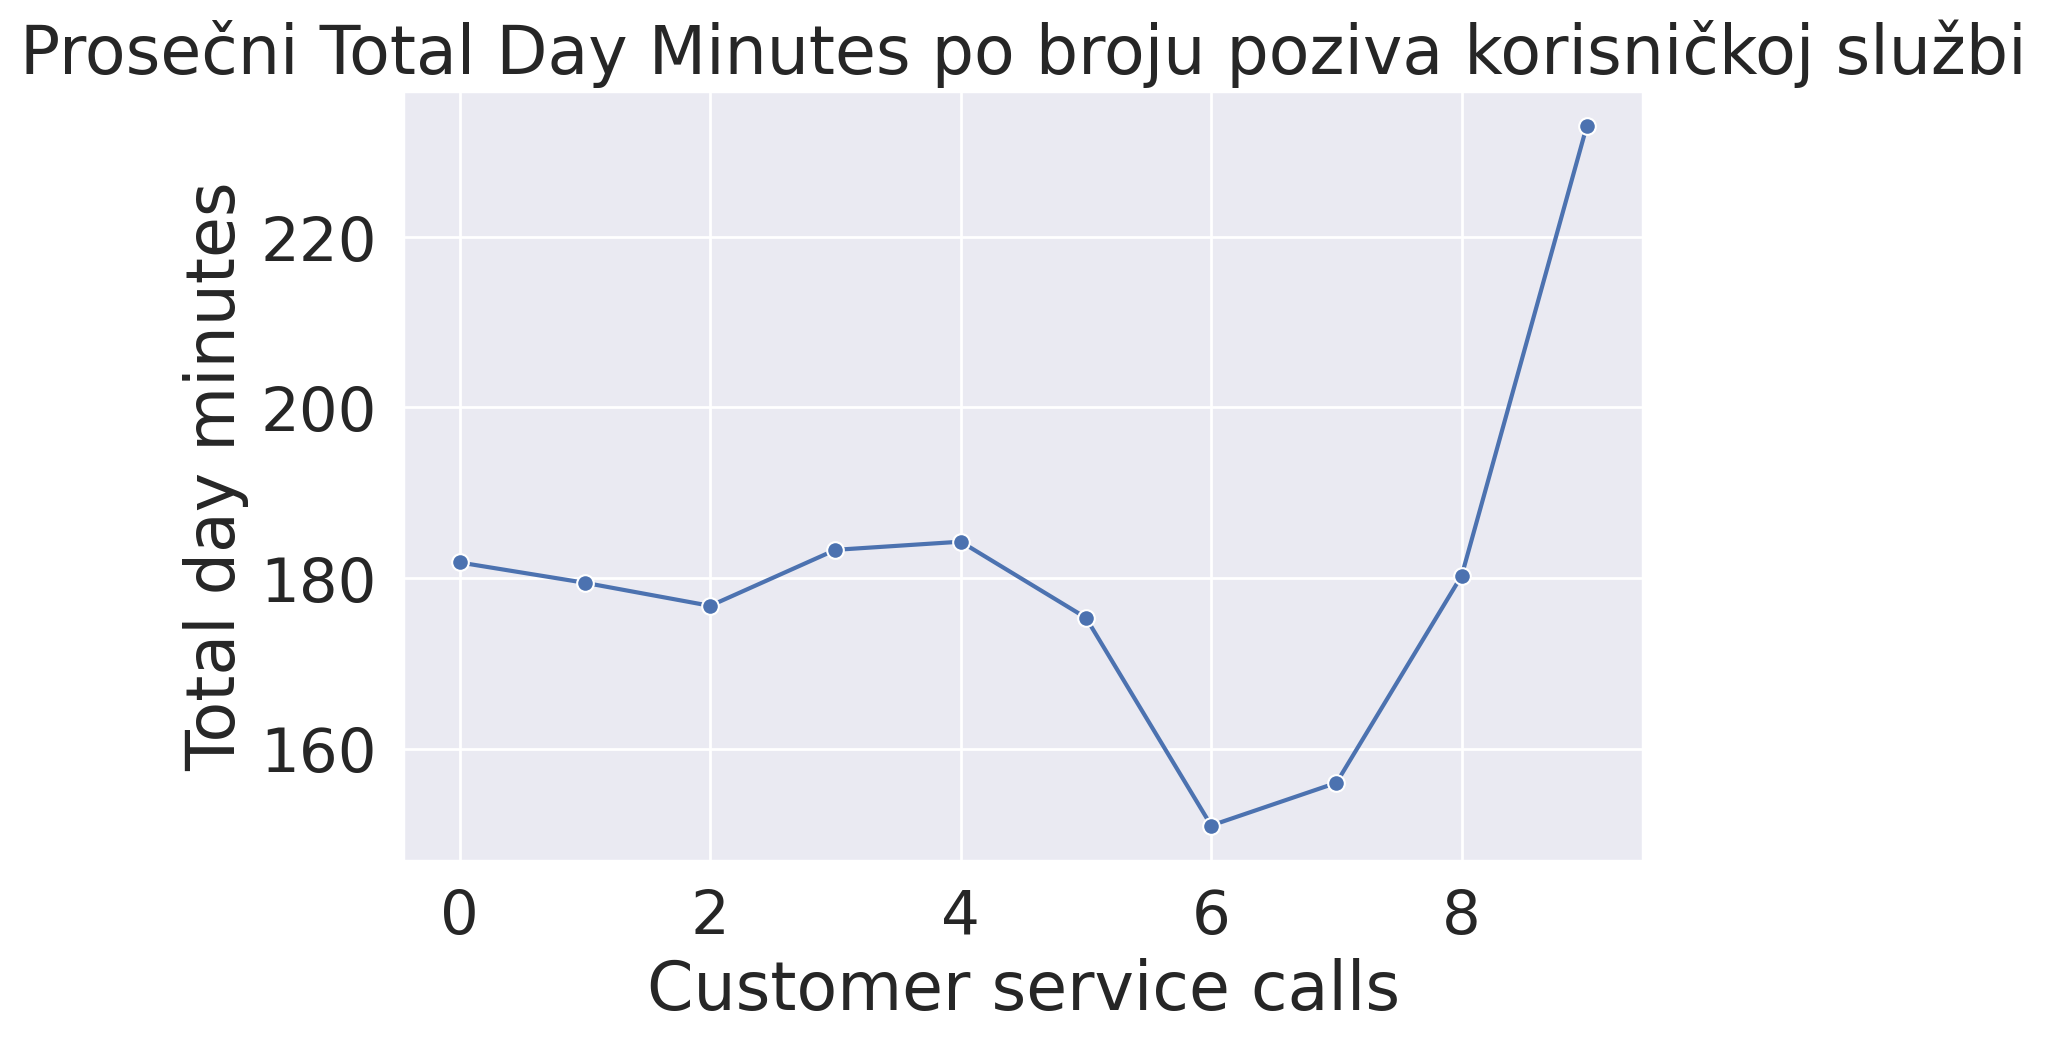

In [ ]:
avg_minutes = df.groupby("Customer service calls")["Total day minutes"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="Customer service calls", y="Total day minutes", data=avg_minutes, marker="o")
plt.title("Prosečni Total Day Minutes po broju poziva korisničkoj službi")
plt.show()

## Matrica dijagrama rasipanja

Matrica dijagrama rasipanja ili pairplot prikazuje sve moguće kombinacije scatter plotova između numeričkih kolona i histogram svake kolone na dijagonali.   
U našem primeru koristili smo nekoliko kolona koje su relevantne za analizu korisnika, dok je boja tačaka određena kolonom Churn.   
Scatter plotovi izvan dijagonale pokazuju međusobnu povezanost kolona, dok histogramske dijagonale prikazuju raspodelu pojedinačnih vrednosti i koliko korisnika pripada svakoj vrednosti.   
Ova matrica omogućava celovit pregled odnosa između svih numeričkih promenljivih, kao i uočavanje potencijalnih korelacija i ekstremnih vrednosti u datasetu.

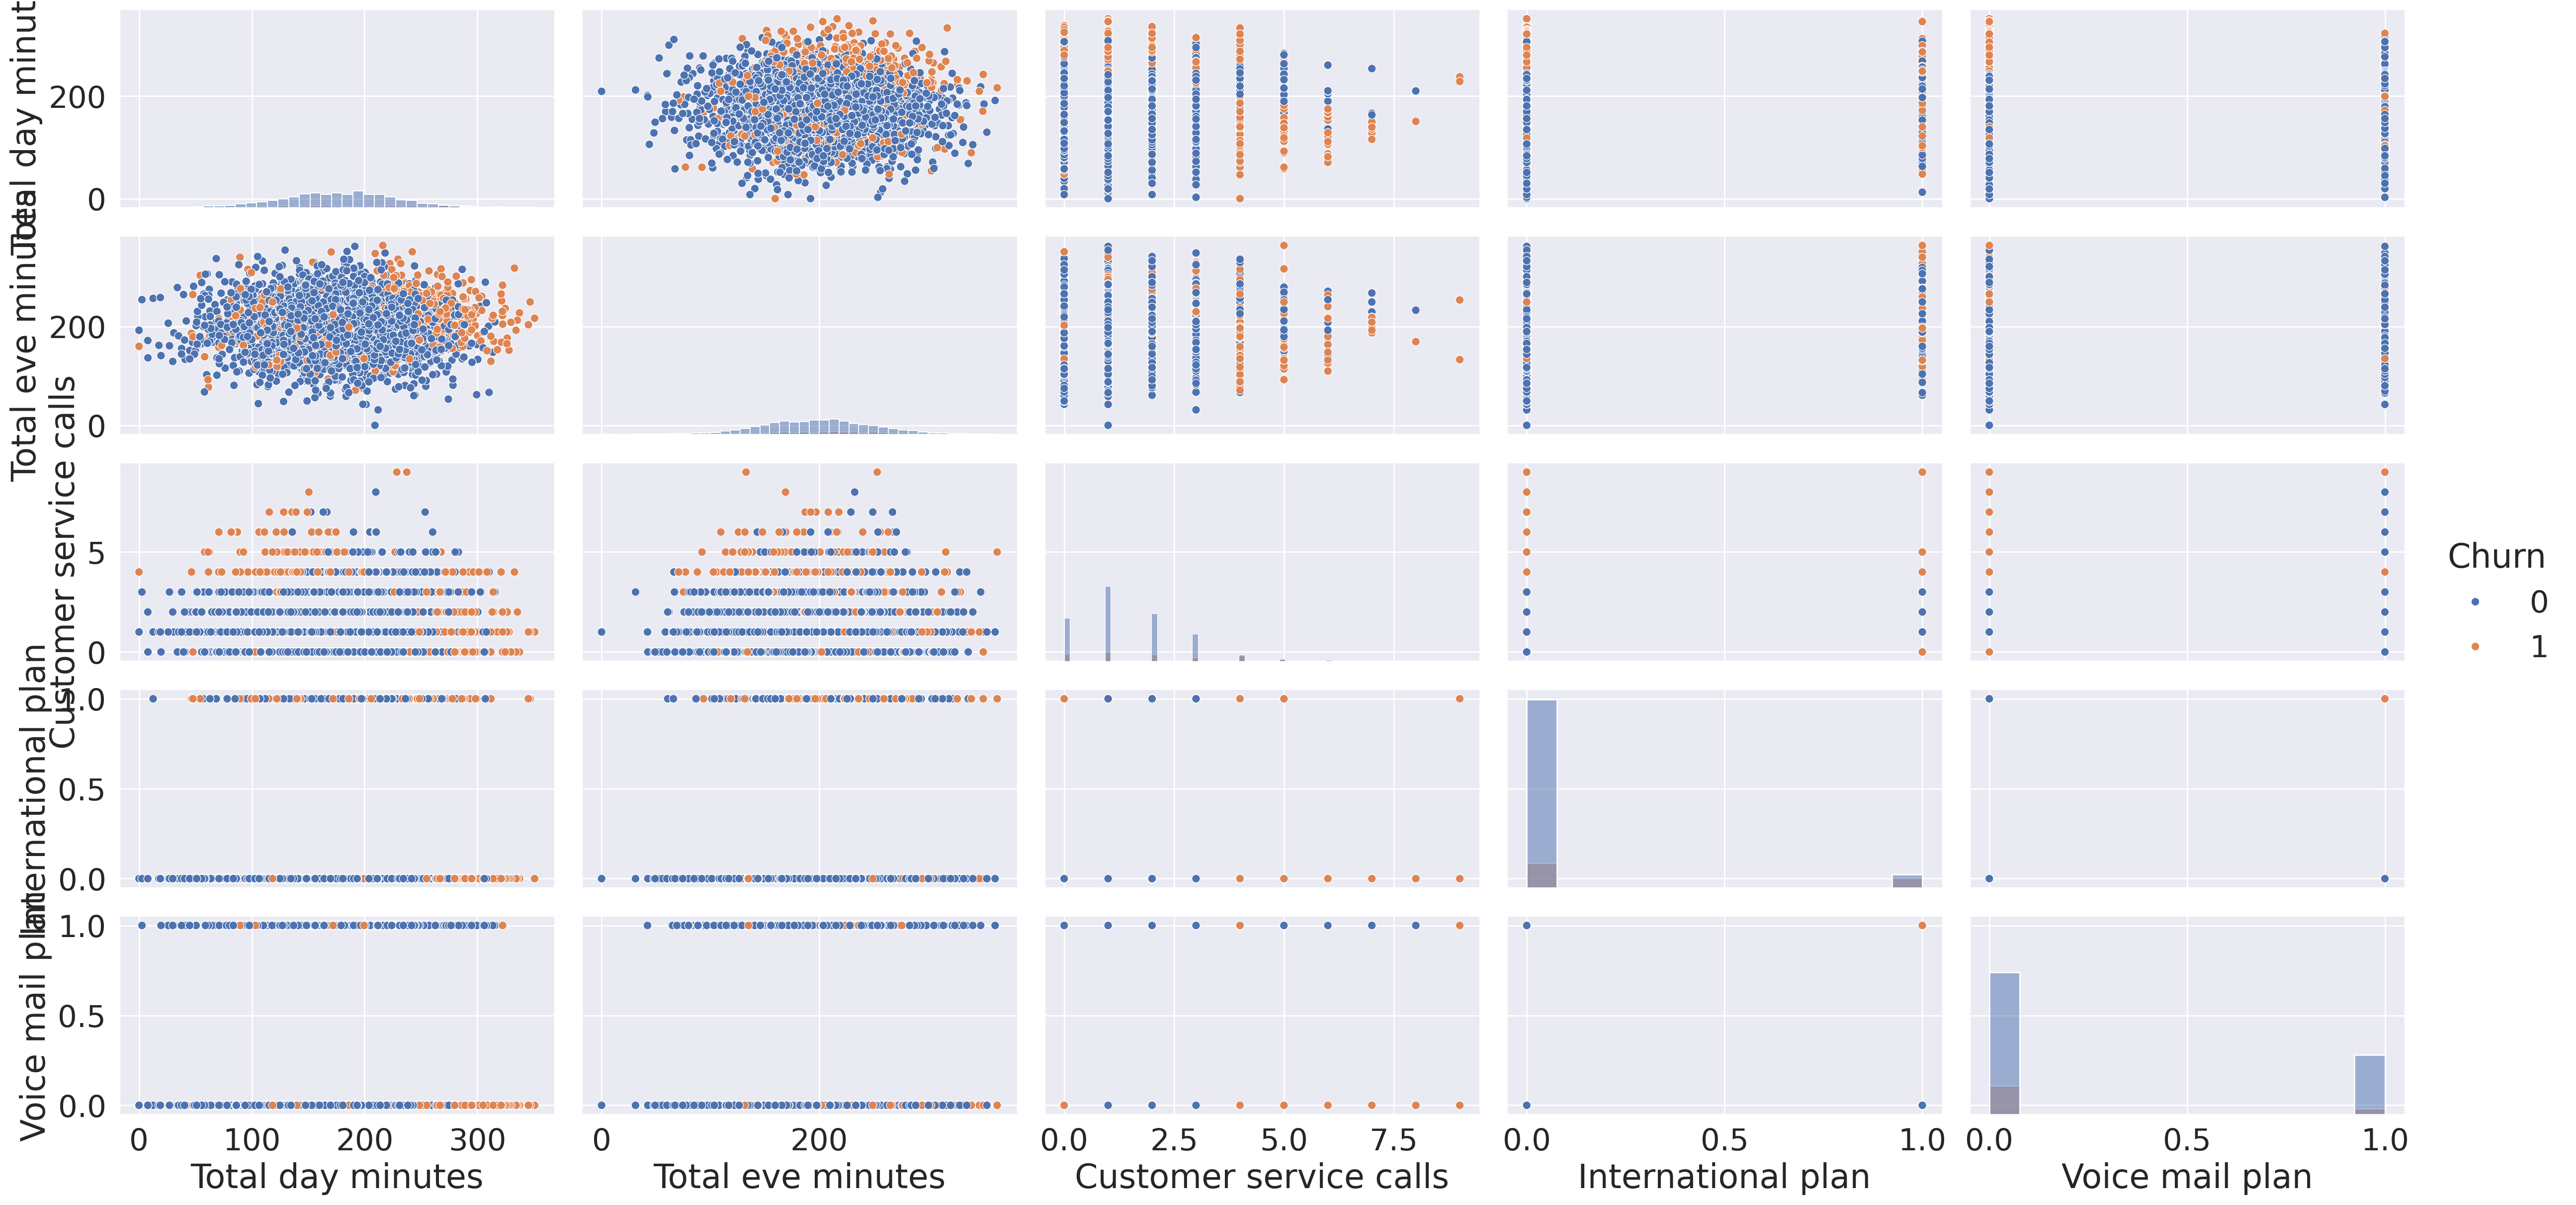

In [ ]:
cols = ["Total day minutes", "Total eve minutes", "Customer service calls",
        "International plan", "Voice mail plan", "Churn"]

sns.set(font_scale=2)
sns.pairplot(df[cols], hue="Churn", diag_kind="hist", height=2.5, aspect=2)
plt.show()

## Sugestije za izbor grafika:

![img/charts_suggestions.jpg](img/chart-suggestions.jpg)

![img/data-story-decision-tree.jpg](img/data-story-decision-tree.jpg)

![img/advice.png](img/advice.png)